#State Level Opioid Overdose Death 1999-2014

### Data Source
This dataset was retrieved from [CDC's WONDER](http://wonder.cdc.gov/) online databases.

###Query Criteria
* Title:  opioid_overdose_deaths_by_cause_of_death
* 2013 Urbanization:  All
* Autopsy:    All
* Gender: All
* Hispanic Origin:    All
* MCD - ICD-10 Codes: T40.0 (Opium), T40.1 (Heroin), T40.2 (Other opioids), T40.3 (Methadone), T40.4 (Other * synthetic narcotics), T40.6 (Other and unspecified narcotics)
* Place of Death: All
* Race:   All
* States: All
* Ten-Year Age Groups:    All
* UCD - ICD-10 Codes: X40 (Accidental poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics), X41 (Accidental poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified), X42 (Accidental poisoning by and exposure to narcotics and psychodysleptics [hallucinogens], not elsewhere classified), X43 (Accidental poisoning by and exposure to other drugs acting on the autonomic nervous system), X44 (Accidental poisoning by and exposure to other and unspecified drugs, medicaments and biological substances), X60 (Intentional self-poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics), X61 (Intentional self-poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified), X62 (Intentional self-poisoning by and exposure to narcotics and psychodysleptics [hallucinogens], not elsewhere classified), X63 (Intentional self-poisoning by and exposure to other drugs acting on the autonomic nervous system), X64 (Intentional self-poisoning by and exposure to other and unspecified drugs, medicaments and biological substances), X85 (Assault by drugs, medicaments and biological substances), Y10 (Poisoning by and exposure to nonopioid analgesics, antipyretics and antirheumatics, undetermined intent), Y11 (Poisoning by and exposure to antiepileptic, sedative-hypnotic, antiparkinsonism and psychotropic drugs, not elsewhere classified, undetermined intent), Y12 (Poisoning by and exposure to narcotics and psychodysleptics [hallucinogens], not elsewhere classified, undetermined intent), Y13 (Poisoning by and exposure to other drugs acting on the autonomic nervous system, undetermined intent), Y14 (Poisoning by and exposure to other and unspecified drugs, medicaments and biological substances, undetermined * intent)
* Weekday:    All
* Year/Month: All
* Group By:   __refer to each section below__
* Show Totals:    Disabled
* Show Zero Values:   Disabled
* Show Suppressed:    False
* Calculate Rates Per:    100,000
* Rate Options:   Default intercensal populations for years 2001-2009 (except Infant Age Groups)

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

##BY CAUSE OF DEATH
----
This data is grouped By: State, Year, Underlying Cause of death, Multiple Cause of death

In [88]:
file_path = "../data/CDC/oos_by_cause_of_death_state_level.txt"
df = pd.read_csv(file_path, sep='\t')
df.head(2)

,Notes,State,State Code,Year,Year Code,Underlying Cause of death,Underlying Cause of death Code,Multiple Cause of death,Multiple Cause of death Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,2000,2000,Accidental poisoning by and exposure to other ...,X44,Other opioids,T40.2,10,4447100,Unreliable
1,NaN,Alabama,1,2001,2001,Accidental poisoning by and exposure to narcot...,X42,Other opioids,T40.2,10,4467634,Unreliable


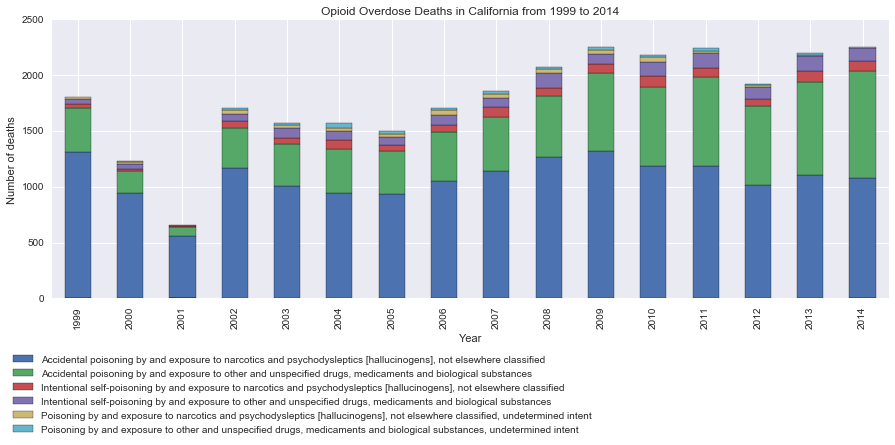

In [89]:
pivoted = pd.pivot_table(df[df.State=='California'], columns='Underlying Cause of death', index='Year', values='Deaths', aggfunc=sum)
fig, ax = plt.subplots(figsize=(15, 5))
pivoted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Opioid Overdose Deaths in California from 1999 to 2014')
ax.legend(bbox_to_anchor=(0.65, -0.5), loc=4, borderaxespad=0.)
ax.set_ylabel('Number of deaths');

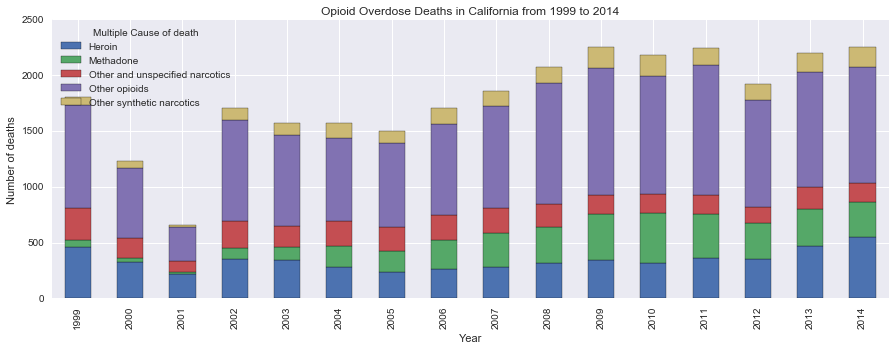

In [90]:
pivoted = pd.pivot_table(df[df.State=='California'], columns='Multiple Cause of death', index='Year', values='Deaths', aggfunc=sum)
fig, ax = plt.subplots(figsize=(15, 5))
pivoted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Opioid Overdose Deaths in California from 1999 to 2014')
ax.set_ylabel('Number of deaths');

##BY Cause of Death and Demographics - Nationwide
----
This dataset is grouped By:   Year, Multiple Cause of death, Ten-Year Age Groups, Gender, Race

In [121]:
file_path = "../data/CDC/oos_by_cause_of_death_demographics_nationwide.txt"
df = pd.read_csv(file_path, sep='\t')
df.head(2)

,Notes,Year,Year Code,Multiple Cause of death,Multiple Cause of death Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate,% of Total Deaths
0,NaN,1999,1999,Opium,T40.0,15-24 years,15-24,Male,M,White,2106-3,1,15756094,Unreliable,0.000%
1,NaN,1999,1999,Opium,T40.0,25-34 years,25-34,Male,M,White,2106-3,2,16391290,Unreliable,0.001%


Let's look at Heroin deaths. I'd like to reproduce the last graph [here](https://www.drugabuse.gov/related-topics/trends-statistics/overdose-death-rates). 

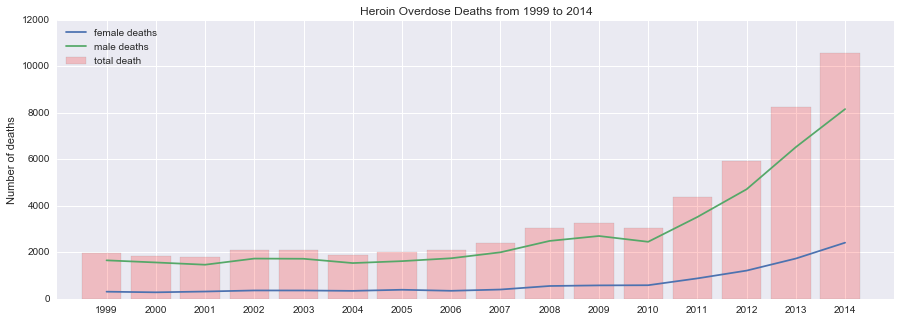

In [122]:
pivoted = pd.pivot_table(df[df['Multiple Cause of death']=='Heroin'], index='Year', columns='Gender', values='Deaths', aggfunc=sum)
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(pivoted.index-0.5, pivoted.apply(sum, axis=1), color='red', alpha=0.2, label='total death')
# ax.bar(pivoted.index, pivoted['Male'], bottom=pivoted['Female'], color='red')
ax.plot(pivoted['Female'], label='female deaths')
ax.plot(pivoted['Male'], label='male deaths')
ax.set_title('Heroin Overdose Deaths from 1999 to 2014')
ax.set_ylabel('Number of deaths')
ax.set_xticks(range(1999, 2015))
ax.set_xlim([1998, 2015])
ax.legend(loc=2);

And among different races:

In [123]:
def _perc_of_total_death(s):
    total = s.sum()
    return s * 100.0 /total

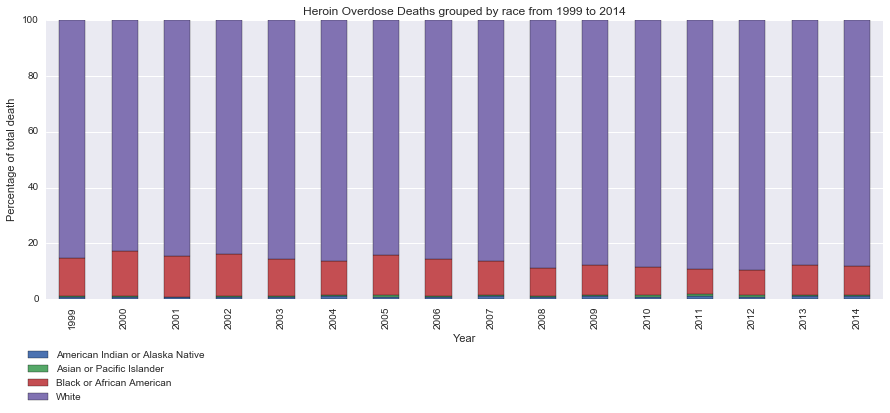

In [126]:
pivoted = pd.pivot_table(df[df['Multiple Cause of death']=='Heroin'], index='Year', columns='Race', values='Deaths', aggfunc=sum)
pivoted = pivoted.apply(_perc_of_total_death, axis=1)
fig, ax = plt.subplots(figsize=(15, 5))
pivoted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Heroin Overdose Deaths grouped by race from 1999 to 2014')
ax.set_ylabel('Percentage of total death')
ax.legend(bbox_to_anchor=(0.2, -0.4), loc=4);

##BY Demographics - State Level
----
This dataset is grouped By:   State, Year, Ten-Year Age Groups, Gender, Race

In [127]:
file_path = "../data/CDC/oos_by_demographics_state_level.txt"
df = pd.read_csv(file_path, sep='\t')
df.head(2)

,Notes,State,State Code,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,2000,2000,35-44 years,35-44,Female,F,White,2106-3,10,248709,Unreliable
1,NaN,Alabama,1,2000,2000,35-44 years,35-44,Male,M,White,2106-3,11,251014,Unreliable


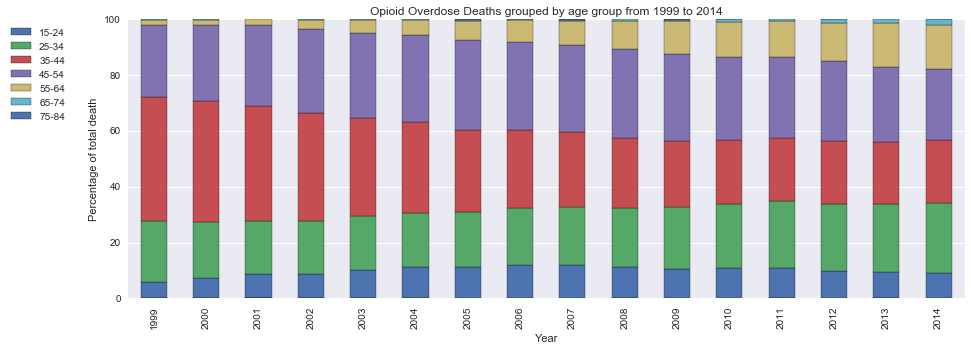

In [140]:
pivoted = pd.pivot_table(df, index='Year', columns='Ten-Year Age Groups Code', values='Deaths', aggfunc=sum)
pivoted = pivoted.apply(_perc_of_total_death, axis=1)
fig, ax = plt.subplots(figsize=(15, 5))
pivoted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Opioid Overdose Deaths grouped by age group from 1999 to 2014')
ax.set_ylabel('Percentage of total death')
ax.set_ylim([0, 100])
ax.legend(bbox_to_anchor=(-0.15, 1), loc=2);